# 안녕하세요:)

## AIVLE 1차 미니프로젝트 '서울시 생활정보 기반 대중교통 수요 분석 ' 과정에 오신 여러분을 환영합니다.
* 본 과정에서는 서울시 생활정보 데이터를 기반으로 데이터 분석을 시도하고 주어진 문제를 해결할 것입니다.


* 우리는 공공 데이터를 활용해 버스노선 관련 인사이트를 도출하여 유용한 정책을 세우는데 도움을 주고자 합니다

## ▣ 우리가 풀어야 하는 문제는 무엇인가요?

* 제공 데이터
    - 구 별 유동인구 데이터
    - 구 별 주민 등록 데이터
    - 구 별 업종 등록 정보
    - 버스 승하차 및 운행 노선 데이터 

### 위 제공 데이터를 분석하여 버스 노선 추가 필요 대상 지역(구 단위)을 선정합니다

## 가설1 - 데이터프레임 불러오기, 처리 및 병합

In [1]:
import pandas as pd

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 시각화 한글폰트 설정
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as spst

plt.rc('font', family='Malgun')
sns.set(font="Malgun Gothic", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid') 

In [3]:
standard = pd.DataFrame({'도착 시군구 코드': [11010, 11020, 11030, 11040, 11050, 11060, 11070, 11080, 11090, 11100, 11110, 11120, 11130, 11140, 11150, 11160, 11170, 11180, 11190, 11200, 11210, 11220, 11230, 11240, 11250],
                         '자치구' :['종로구','중구','용산구','성동구','광진구','동대문구','중랑구','성북구','강북구','도봉구','노원구','은평구','서대문구','마포구','양천구','강서구','구로구','금천구','영등포구','동작구','관악구','서초구','강남구','송파구','강동구']})

In [4]:
df_seoul_bus_station = pd.read_csv('df_seoul_bus_station.csv', sep=",", encoding = 'UTF-8')
df_seoul_moving = pd.read_csv('df_seoul_moving.csv', sep=",", encoding = 'UTF-8')
df_seoul_people = pd.read_csv('df_seoul_people.csv', sep=",", encoding = 'UTF-8')
df_seoul_business = pd.read_csv('df_seoul_business.csv', sep=",", encoding = 'UTF-8')

In [5]:
df = pd.merge(standard,df_seoul_people,how='inner', on='자치구')
df = pd.merge(df,df_seoul_business,how='inner', on='자치구')
df = pd.merge(df,df_seoul_bus_station,how='inner', on='자치구')
df = pd.merge(df,df_seoul_moving,how='inner', on='도착 시군구 코드')

In [6]:
df_seoul_bus_station['승하차총승객수'] = df_seoul_bus_station['승차총승객수'] + df_seoul_bus_station['하차총승객수']

## 1. 가설 1 - 가설 수립

**업종별 종사자수가 많은 자치구는 승하차가 많을 것이다.**

## 2.단변량 분석

In [7]:
df_merged = pd.merge(df_seoul_bus_station, df_seoul_business, on='자치구', how='inner')


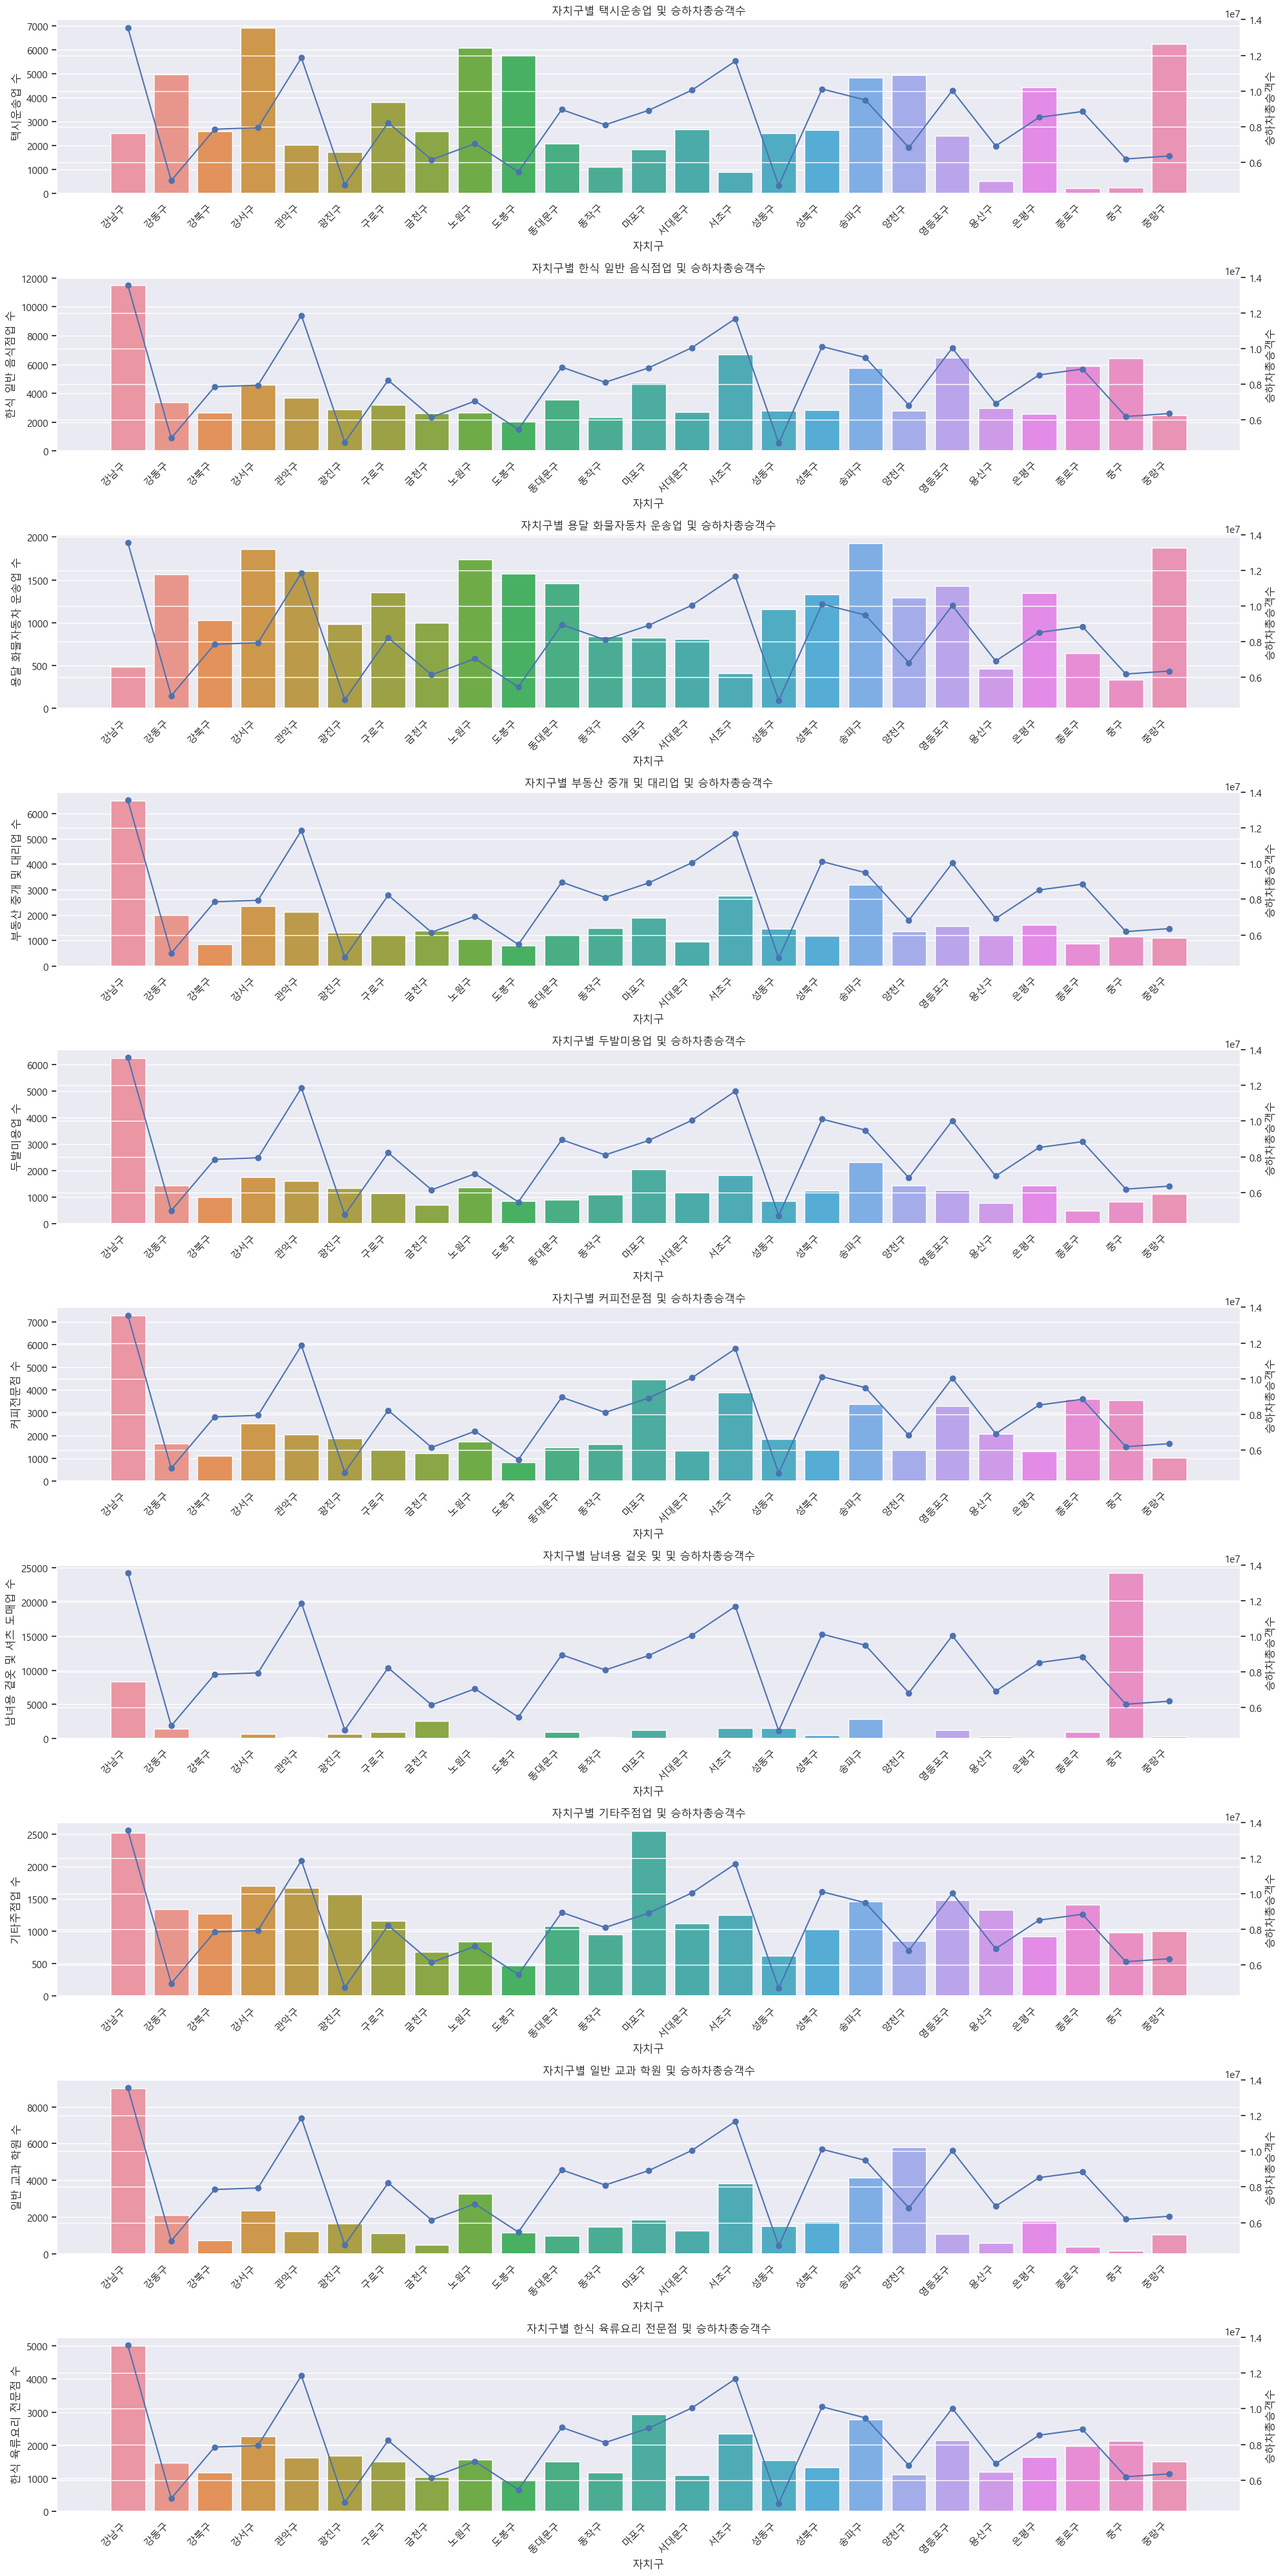

In [8]:
df_merged[['한식 육류요리 전문점.1', '일반 교과 학원.1', '남녀용 겉옷 및 셔츠 도매업.1', '두발미용업.1', 
                       '부동산 중개 및 대리업.1', '택시운송업.1', '한식 일반 음식점업.1', '용달 화물자동차 운송업.1',
                       '커피전문점.1', '기타주점업.1']] = df_merged[['한식 육류요리 전문점.1', '일반 교과 학원.1', '남녀용 겉옷 및 셔츠 도매업.1', '두발미용업.1', 
                       '부동산 중개 및 대리업.1', '택시운송업.1', '한식 일반 음식점업.1', '용달 화물자동차 운송업.1',
                       '커피전문점.1', '기타주점업.1']].replace({',': ''}, regex=True).apply(pd.to_numeric)

plt.figure(figsize=(20, 40))

plt.subplot(10, 1, 1)
ax1 = sns.barplot(x='자치구', y='택시운송업.1', data=df_merged)
# 두 번째 y-축을 생성하여 '승하차총승객수' 값을 플로팅
ax2 = ax1.twinx()
ax2.plot(df_merged['자치구'], df_merged['승하차총승객수'], color='b', marker='o')
# 각 축에 대한 레이블 및 제목 설정
ax1.set_title('자치구별 택시운송업 및 승하차총승객수')
ax1.set_xlabel('자치구')
ax1.set_ylabel('택시운송업 수')
ax2.set_ylabel('승하차총승객수')
# x-축 눈금 레이블 회전 및 가로 정렬
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')


plt.subplot(10, 1, 2)
ax1 = sns.barplot(x='자치구', y='한식 일반 음식점업.1', data=df_merged)
# 두 번째 y-축을 생성하여 '승하차총승객수' 값을 플로팅
ax2 = ax1.twinx()
ax2.plot(df_merged['자치구'], df_merged['승하차총승객수'], color='b', marker='o')
# 각 축에 대한 레이블 및 제목 설정
ax1.set_title('자치구별 한식 일반 음식점업 및 승하차총승객수')
ax1.set_xlabel('자치구')
ax1.set_ylabel('한식 일반 음식점업 수')
ax2.set_ylabel('승하차총승객수')
# x-축 눈금 레이블 회전 및 가로 정렬
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')

plt.subplot(10, 1, 3)
ax1 = sns.barplot(x='자치구', y='용달 화물자동차 운송업.1', data=df_merged)
# 두 번째 y-축을 생성하여 '승하차총승객수' 값을 플로팅
ax2 = ax1.twinx()
ax2.plot(df_merged['자치구'], df_merged['승하차총승객수'], color='b', marker='o')
# 각 축에 대한 레이블 및 제목 설정
ax1.set_title('자치구별 용달 화물자동차 운송업 및 승하차총승객수')
ax1.set_xlabel('자치구')
ax1.set_ylabel('용달 화물자동차 운송업 수')
ax2.set_ylabel('승하차총승객수')
# x-축 눈금 레이블 회전 및 가로 정렬
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')

plt.subplot(10, 1, 4)
ax1 = sns.barplot(x='자치구', y='부동산 중개 및 대리업.1', data=df_merged)
# 두 번째 y-축을 생성하여 '승하차총승객수' 값을 플로팅
ax2 = ax1.twinx()
ax2.plot(df_merged['자치구'], df_merged['승하차총승객수'], color='b', marker='o')
# 각 축에 대한 레이블 및 제목 설정
ax1.set_title('자치구별 부동산 중개 및 대리업 및 승하차총승객수')
ax1.set_xlabel('자치구')
ax1.set_ylabel('부동산 중개 및 대리업 수')
ax2.set_ylabel('승하차총승객수')
# x-축 눈금 레이블 회전 및 가로 정렬
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')

plt.subplot(10, 1, 5)
ax1 = sns.barplot(x='자치구', y='두발미용업.1', data=df_merged)
# 두 번째 y-축을 생성하여 '승하차총승객수' 값을 플로팅
ax2 = ax1.twinx()
ax2.plot(df_merged['자치구'], df_merged['승하차총승객수'], color='b', marker='o')
# 각 축에 대한 레이블 및 제목 설정
ax1.set_title('자치구별 두발미용업 및 승하차총승객수')
ax1.set_xlabel('자치구')
ax1.set_ylabel('두발미용업 수')
ax2.set_ylabel('승하차총승객수')
# x-축 눈금 레이블 회전 및 가로 정렬
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')

plt.subplot(10, 1, 6)
ax1 = sns.barplot(x='자치구', y='커피전문점.1', data=df_merged)
# 두 번째 y-축을 생성하여 '승하차총승객수' 값을 플로팅
ax2 = ax1.twinx()
ax2.plot(df_merged['자치구'], df_merged['승하차총승객수'], color='b', marker='o')
# 각 축에 대한 레이블 및 제목 설정
ax1.set_title('자치구별 커피전문점 및 승하차총승객수')
ax1.set_xlabel('자치구')
ax1.set_ylabel('커피전문점 수')
ax2.set_ylabel('승하차총승객수')
# x-축 눈금 레이블 회전 및 가로 정렬
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')

plt.subplot(10, 1, 7)
ax1 = sns.barplot(x='자치구', y='남녀용 겉옷 및 셔츠 도매업.1', data=df_merged)
# 두 번째 y-축을 생성하여 '승하차총승객수' 값을 플로팅
ax2 = ax1.twinx()
ax2.plot(df_merged['자치구'], df_merged['승하차총승객수'], color='b', marker='o')
# 각 축에 대한 레이블 및 제목 설정
ax1.set_title('자치구별 남녀용 겉옷 및 및 승하차총승객수')
ax1.set_xlabel('자치구')
ax1.set_ylabel('남녀용 겉옷 및 셔츠 도매업 수')
ax2.set_ylabel('승하차총승객수')
# x-축 눈금 레이블 회전 및 가로 정렬
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')

plt.subplot(10, 1, 8)
ax1 = sns.barplot(x='자치구', y='기타주점업.1', data=df_merged)
# 두 번째 y-축을 생성하여 '승하차총승객수' 값을 플로팅
ax2 = ax1.twinx()
ax2.plot(df_merged['자치구'], df_merged['승하차총승객수'], color='b', marker='o')
# 각 축에 대한 레이블 및 제목 설정
ax1.set_title('자치구별 기타주점업 및 승하차총승객수')
ax1.set_xlabel('자치구')
ax1.set_ylabel('기타주점업 수')
ax2.set_ylabel('승하차총승객수')
# x-축 눈금 레이블 회전 및 가로 정렬
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')

plt.subplot(10, 1, 9)
ax1 = sns.barplot(x='자치구', y='일반 교과 학원.1', data=df_merged)
# 두 번째 y-축을 생성하여 '승하차총승객수' 값을 플로팅
ax2 = ax1.twinx()
ax2.plot(df_merged['자치구'], df_merged['승하차총승객수'], color='b', marker='o')
# 각 축에 대한 레이블 및 제목 설정
ax1.set_title('자치구별 일반 교과 학원 및 승하차총승객수')
ax1.set_xlabel('자치구')
ax1.set_ylabel('일반 교과 학원 수')
ax2.set_ylabel('승하차총승객수')
# x-축 눈금 레이블 회전 및 가로 정렬
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')

plt.subplot(10, 1, 10)
ax1 = sns.barplot(x='자치구', y='한식 육류요리 전문점.1', data=df_merged)
# 두 번째 y-축을 생성하여 '승하차총승객수' 값을 플로팅
ax2 = ax1.twinx()
ax2.plot(df_merged['자치구'], df_merged['승하차총승객수'], color='b', marker='o')
# 각 축에 대한 레이블 및 제목 설정
ax1.set_title('자치구별 한식 육류요리 전문점 및 승하차총승객수')
ax1.set_xlabel('자치구')
ax1.set_ylabel('한식 육류요리 전문점 수')
ax2.set_ylabel('승하차총승객수')
# x-축 눈금 레이블 회전 및 가로 정렬
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')


plt.tight_layout()
plt.show()

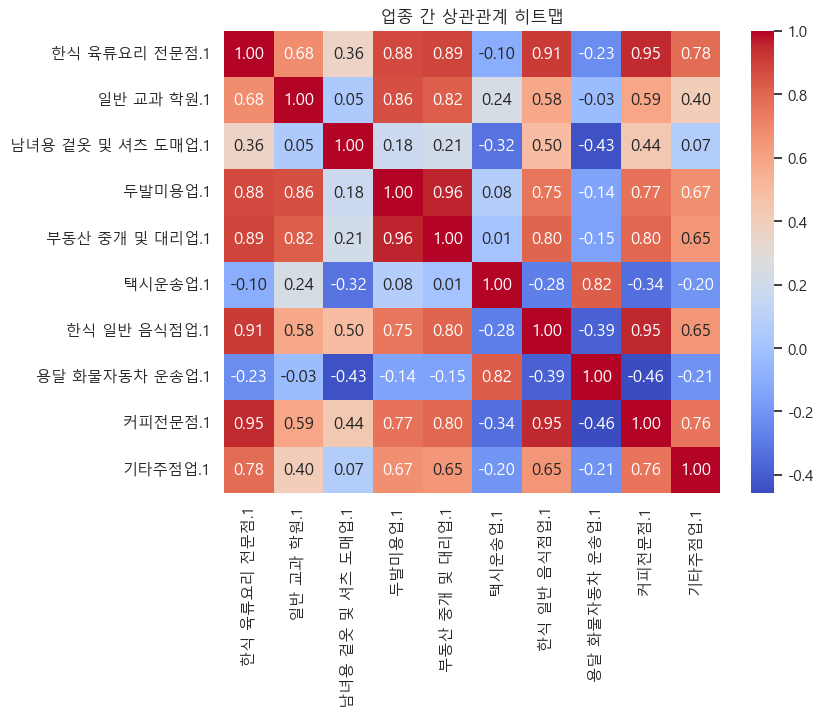

In [9]:
columns_to_convert = ['한식 육류요리 전문점.1', '일반 교과 학원.1', '남녀용 겉옷 및 셔츠 도매업.1', '두발미용업.1', 
                       '부동산 중개 및 대리업.1', '택시운송업.1', '한식 일반 음식점업.1', '용달 화물자동차 운송업.1',
                       '커피전문점.1', '기타주점업.1']

df[columns_to_convert] = df[columns_to_convert].replace({',': ''}, regex=True).apply(pd.to_numeric)

# 업종 간 상관관계 히트맵
correlation_matrix = df[columns_to_convert].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('업종 간 상관관계 히트맵')
plt.show()

# 자치구 별, 업종 별 종사자 수와 승하차총승객수의 상관관계

## 3.이변량 분석

In [10]:
my_df = pd.merge(df_seoul_bus_station[['자치구', '승차총승객수', '하차총승객수', '승하차총승객수']],
                 df_seoul_business[['자치구', '커피전문점.1', '택시운송업.1', '한식 일반 음식점업.1', '용달 화물자동차 운송업.1', '부동산 중개 및 대리업.1', '두발미용업.1', '남녀용 겉옷 및 셔츠 도매업.1', '기타주점업.1', '일반 교과 학원.1', '한식 육류요리 전문점.1']]
                 ,how='inner', on='자치구')

job_list = ['커피전문점.1', '택시운송업.1', '한식 일반 음식점업.1', '용달 화물자동차 운송업.1', '부동산 중개 및 대리업.1', '두발미용업.1', '남녀용 겉옷 및 셔츠 도매업.1', '기타주점업.1', '일반 교과 학원.1', '한식 육류요리 전문점.1']

for job in job_list:
    my_df[job] = my_df[job].str.replace(',', '')
    my_df[job] = my_df[job].astype(float)

In [11]:
from scipy import stats as sts

df_pearson = pd.DataFrame()

df_pearson = pd.DataFrame({'업종':[], 'p-value':[]})

for job in job_list:
    result = sts.pearsonr(my_df['승하차총승객수'], my_df[job])
    result_df = pd.DataFrame({'업종': [job], 'p-value': [result[1]]})
    df_pearson = pd.concat([df_pearson, result_df])
    print("승하차승객수와 ", job, "의 피어슨 상관 검정 결과: ", result)


승하차승객수와  커피전문점.1 의 피어슨 상관 검정 결과:  PearsonRResult(statistic=0.5751590740304122, pvalue=0.002631514185552388)
승하차승객수와  택시운송업.1 의 피어슨 상관 검정 결과:  PearsonRResult(statistic=-0.25432727794877497, pvalue=0.21988651202685328)
승하차승객수와  한식 일반 음식점업.1 의 피어슨 상관 검정 결과:  PearsonRResult(statistic=0.619782596910611, pvalue=0.0009520131362679481)
승하차승객수와  용달 화물자동차 운송업.1 의 피어슨 상관 검정 결과:  PearsonRResult(statistic=-0.1846071890561459, pvalue=0.3770160578783582)
승하차승객수와  부동산 중개 및 대리업.1 의 피어슨 상관 검정 결과:  PearsonRResult(statistic=0.5945434956777469, pvalue=0.001722692019322305)
승하차승객수와  두발미용업.1 의 피어슨 상관 검정 결과:  PearsonRResult(statistic=0.5928398752323366, pvalue=0.0017899438018785132)
승하차승객수와  남녀용 겉옷 및 셔츠 도매업.1 의 피어슨 상관 검정 결과:  PearsonRResult(statistic=-0.019014805757810394, pvalue=0.9281168009428379)
승하차승객수와  기타주점업.1 의 피어슨 상관 검정 결과:  PearsonRResult(statistic=0.5467972072974783, pvalue=0.004678072522409386)
승하차승객수와  일반 교과 학원.1 의 피어슨 상관 검정 결과:  PearsonRResult(statistic=0.4406249022678831, pvalue=0.02748726592006

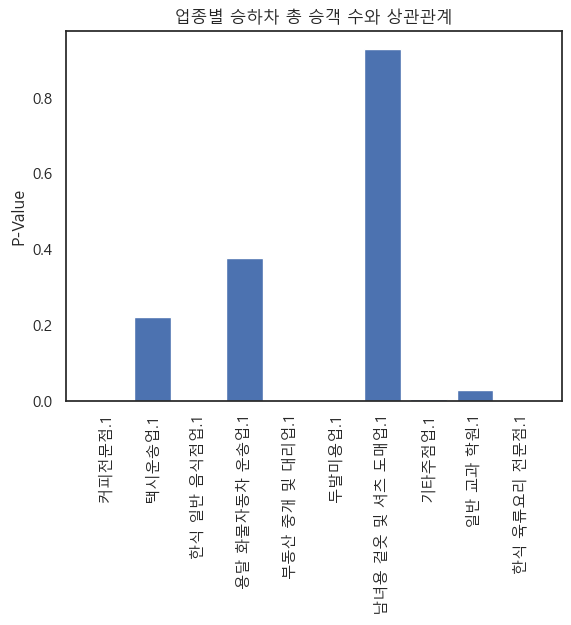

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc("font", family = "Malgun Gothic")
sns.set(font="Malgun Gothic", 
rc={"axes.unicode_minus":False}, style='white')

plt.bar(df_pearson['업종'], df_pearson['p-value'] )


plt.xticks(rotation = 90)

plt.title('업종별 승하차 총 승객 수와 상관관계')
plt.ylabel('P-Value')

# 그래프 보여주기
plt.show()

## 가설2 - 데이터프레임 불러오기, 처리 및 병합

In [13]:
standard = pd.DataFrame({'도착 시군구 코드': [11010, 11020, 11030, 11040, 11050, 11060, 11070, 11080, 11090, 11100, 11110, 11120, 11130, 11140, 11150, 11160, 11170, 11180, 11190, 11200, 11210, 11220, 11230, 11240, 11250],
                         '자치구' :['종로구','중구','용산구','성동구','광진구','동대문구','중랑구','성북구','강북구','도봉구','노원구','은평구','서대문구','마포구','양천구','강서구','구로구','금천구','영등포구','동작구','관악구','서초구','강남구','송파구','강동구']})

In [14]:
standard

,도착 시군구 코드,자치구
0,11010,종로구
1,11020,중구
2,11030,용산구
3,11040,성동구
4,11050,광진구
5,11060,동대문구
6,11070,중랑구
7,11080,성북구
8,11090,강북구
9,11100,도봉구


In [15]:
# 버스 정류장 데이터 - df_seoul_bus_station
# 유동인구 데이터 - df_seoul_moving
# 구별 상권 데이터 - df_seoul_business
# 구별 등록 인구 데이터 - df_seoul_people

In [16]:
df1 = pd.read_csv('df_seoul_bus_station.csv', sep=",", encoding = 'UTF-8')
df3 = pd.read_csv('df_seoul_people.csv', sep=",", encoding = 'UTF-8')

In [17]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
df1.head()

,자치구,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수
0,강남구,501,98,6960336,6597087,123.257234,116.824633
1,강동구,367,22,2515582,2460905,91.578944,89.588445
2,강북구,410,71,3998077,3858057,126.465395,122.036345
3,강서구,567,51,3981173,3963283,86.932767,86.542122
4,관악구,466,81,5862490,5996915,134.946712,138.040996


In [18]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
df3.head()

,자치구,남자,여자,합계
0,종로구,71890,78563,150453
1,중구,63495,68298,131793
2,용산구,109826,117280,227106
3,성동구,137620,147146,284766
4,광진구,167562,183618,351180


In [19]:
# 데이터프레임 병합
df5 = pd.merge(df1, df3)

---

## 1.가설 2 - 가설 수립
**인구가 많은 자치구에 승하차가 많을 것이고, 정류장도 많일 것이다.**

## 2.단변량 분석

In [20]:
# 시각화 한글폰트 설정
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as spst

plt.rc('font', family='Malgun')
sns.set(font="Malgun Gothic", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')  

### 1)


In [21]:
data = df5.sort_values(by = '합계', ascending = False)
data['자치구']

17     송파구
3      강서구
0      강남구
8      노원구
4      관악구
21     은평구
1      강동구
18     양천구
16     성북구
6      구로구
14     서초구
19    영등포구
11     동작구
24     중랑구
12     마포구
10    동대문구
5      광진구
13    서대문구
9      도봉구
2      강북구
15     성동구
7      금천구
20     용산구
22     종로구
23      중구
Name: 자치구, dtype: object

### 2)

[Text(0, 0, '강남구'),
 Text(1, 0, '서초구'),
 Text(2, 0, '관악구'),
 Text(3, 0, '서대문구'),
 Text(4, 0, '성북구'),
 Text(5, 0, '영등포구'),
 Text(6, 0, '송파구'),
 Text(7, 0, '동대문구'),
 Text(8, 0, '마포구'),
 Text(9, 0, '종로구'),
 Text(10, 0, '은평구'),
 Text(11, 0, '구로구'),
 Text(12, 0, '동작구'),
 Text(13, 0, '강북구'),
 Text(14, 0, '강서구'),
 Text(15, 0, '노원구'),
 Text(16, 0, '용산구'),
 Text(17, 0, '양천구'),
 Text(18, 0, '중랑구'),
 Text(19, 0, '중구'),
 Text(20, 0, '금천구'),
 Text(21, 0, '도봉구'),
 Text(22, 0, '강동구'),
 Text(23, 0, '성동구'),
 Text(24, 0, '광진구')]

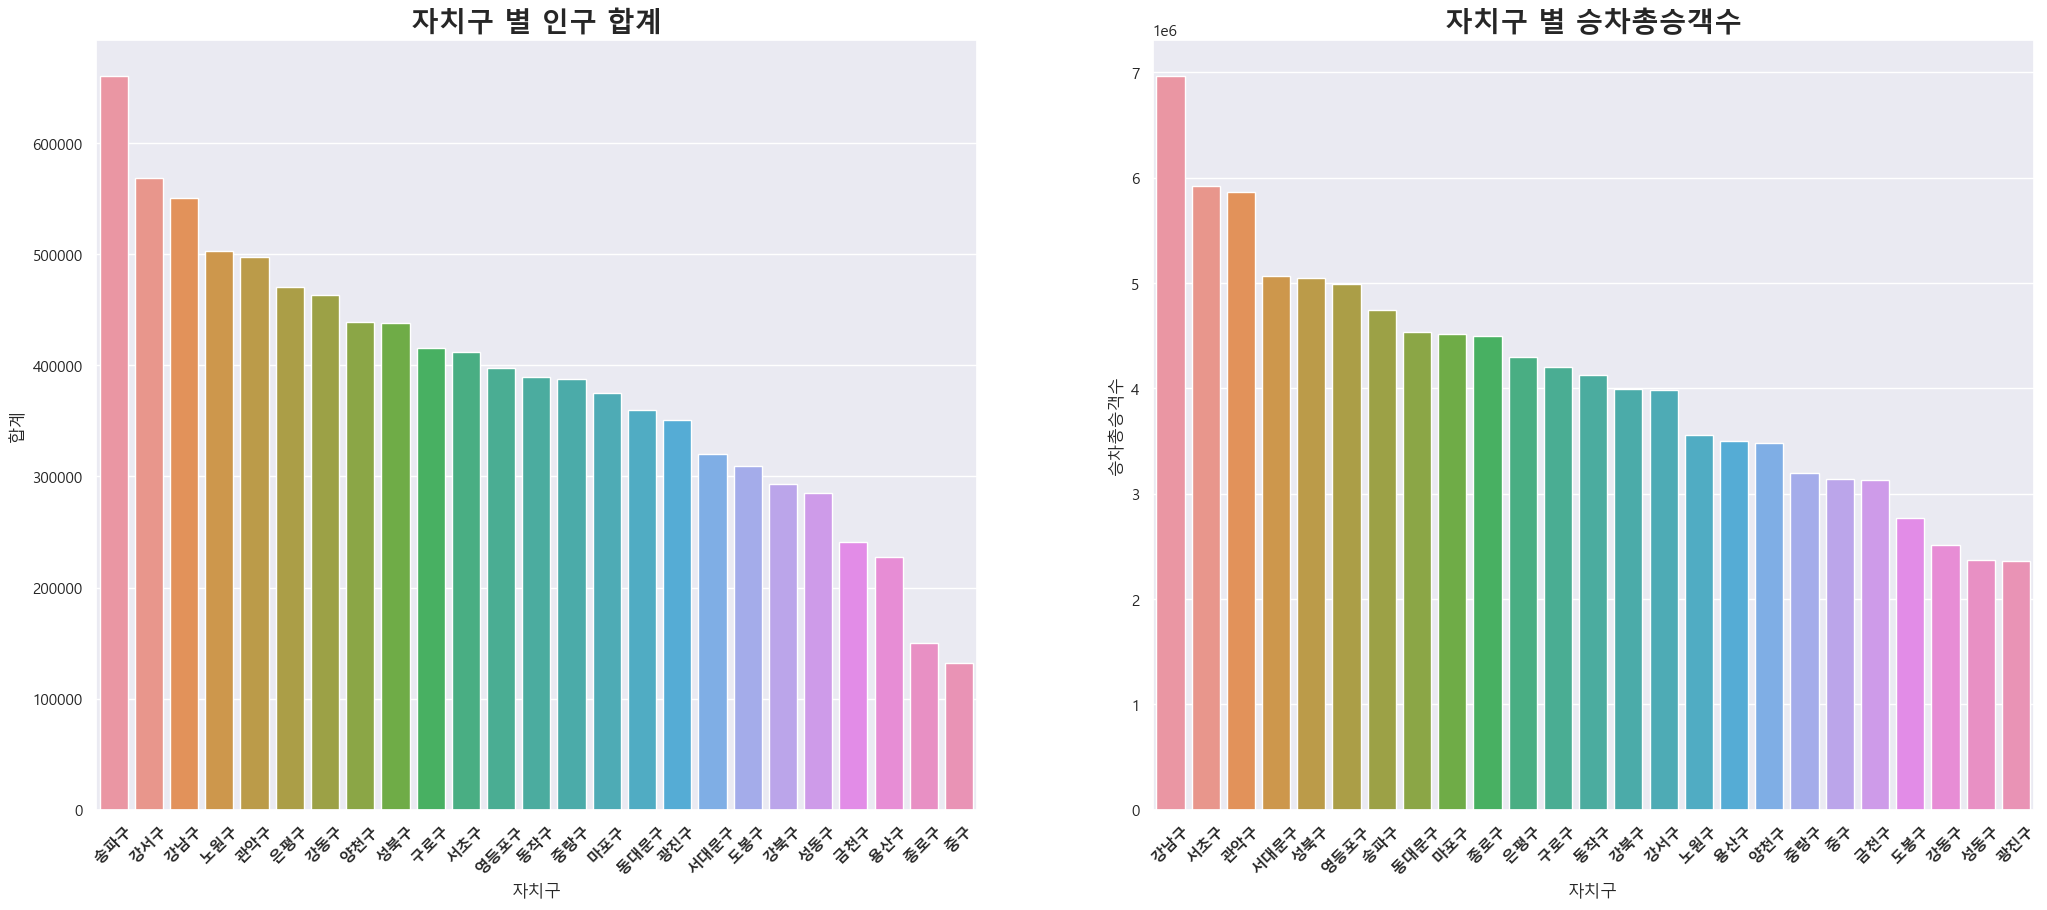

In [22]:
fig, axe = plt.subplots(1,2, figsize = (25, 10))
sns.barplot(data = df5.sort_values(by = '합계', ascending = False), x = data['자치구'], y ='합계', ax = axe[0])
sns.barplot(data = df5.sort_values(by = '승차총승객수', ascending = False), x = df5.sort_values(by = '승차총승객수', ascending = False)['자치구'], y ='승차총승객수', ax = axe[1])
title_font = {'fontsize': 20, 'fontweight': 'bold'}
axe[0].set_title('자치구 별 인구 합계', title_font)
axe[1].set_title('자치구 별 승차총승객수', title_font)
axe[0].set_xticklabels(data['자치구'], rotation = 45, fontweight = 'bold')
axe[1].set_xticklabels(df5.sort_values(by = '승차총승객수', ascending = False)['자치구'], rotation = 45, fontweight = 'bold')

- 인구 합계는 **송파구**가 젤 많다.
- 승차총승객수는 **강남구**가 젤 많다.
- 정류장 수는 **서초구**가 젤 많다.

## 3.이변량 분석

### 3)

### 상관계수를 구하고 HeatMap으로 시각화 후 나름의 분석을 해보세요.



인구 수와 정류장 수의 상관관계(p-value) :  0.001253315951320806
승차 총 승객수와 정류장 수의 상관관계(p-value) :  0.002082561681352034


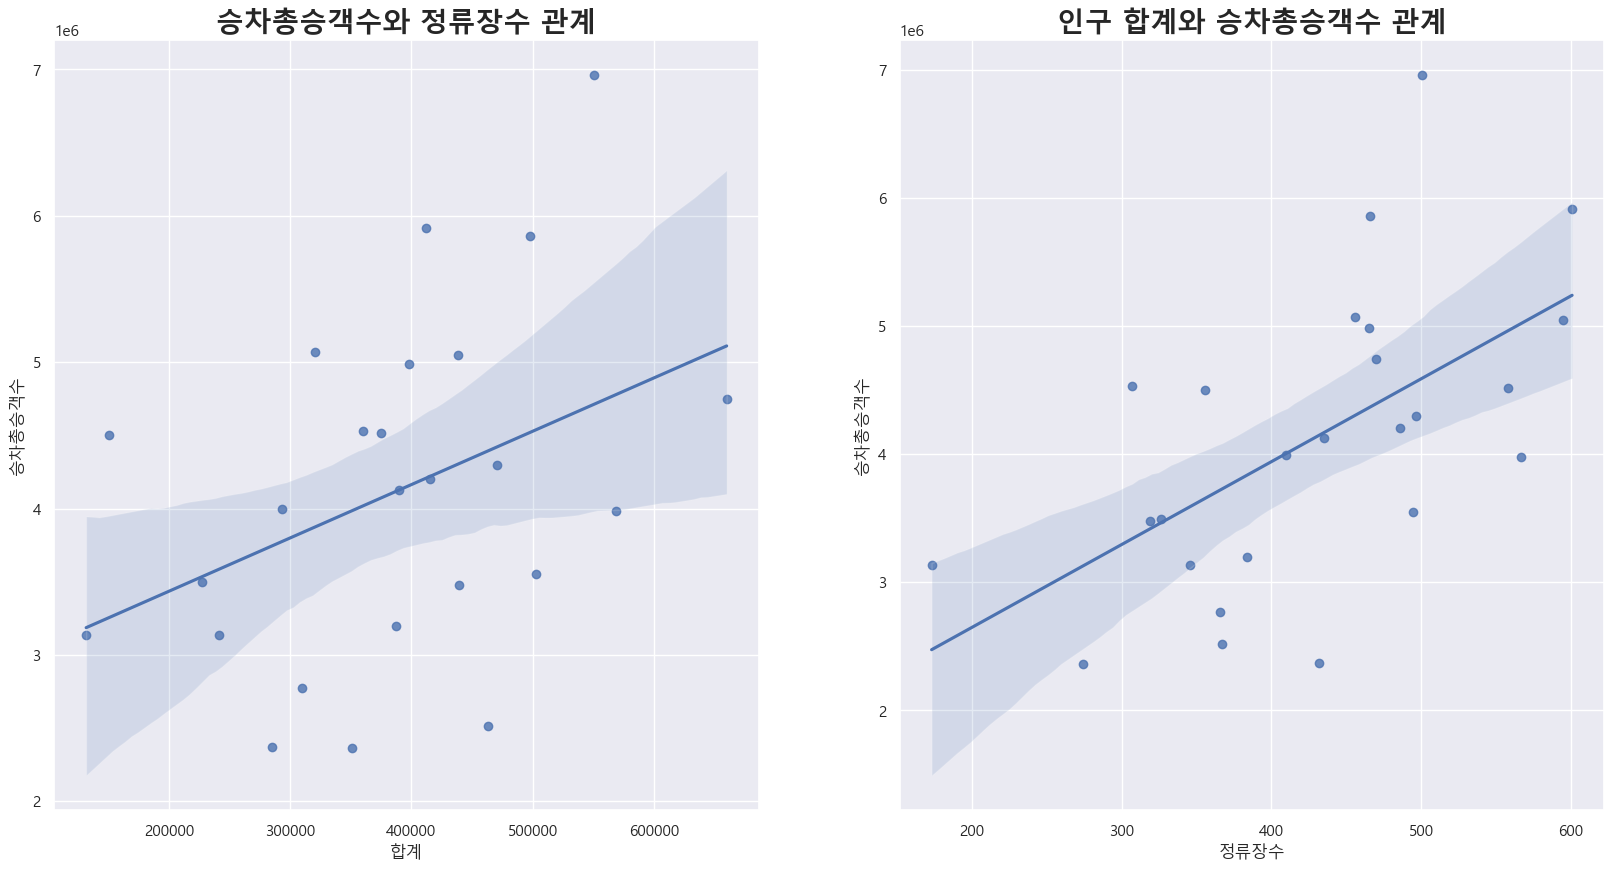

In [23]:
fig, axe = plt.subplots(1,2, figsize = (20,10))
sns.regplot(data = df5, x = '합계', y = '승차총승객수', ax = axe[0])
sns.regplot(data = df5, x = '정류장수', y = '승차총승객수', ax = axe[1])

title_font = {'fontsize': 20, 'fontweight': 'bold'}
axe[1].set_title('인구 합계와 승차총승객수 관계', title_font)
axe[0].set_title('승차총승객수와 정류장수 관계', title_font)


print('인구 수와 정류장 수의 상관관계(p-value) : ', spst.pearsonr(df5['합계'], df5['정류장수'])[1])
print('승차 총 승객수와 정류장 수의 상관관계(p-value) : ', spst.pearsonr(df5['승차총승객수'], df5['정류장수'])[1])

<Axes: >

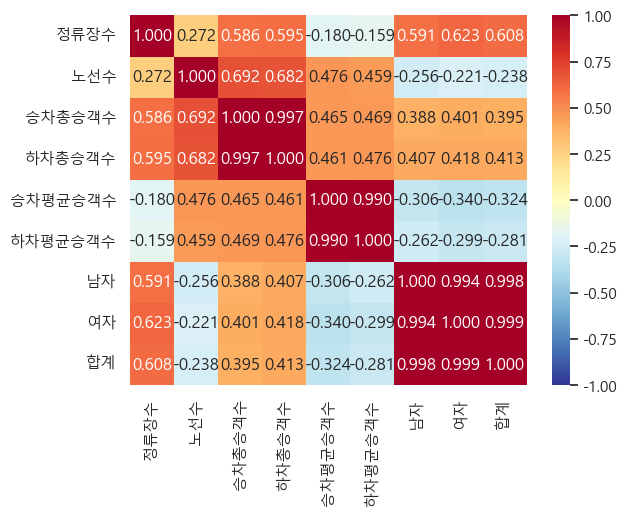

In [24]:
# 아래에 실습코드를 작성하고 상관계수를 확인 및 시각화 합니다.
import scipy.stats as spst
sns.heatmap(df5.iloc[:, 1:].corr(),
                  annot = True, # 숫자(상관계수) 표기 여부
                  fmt = '.3f', # 숫자 포맷: 소수점 3자리까지 표기
                  cmap = 'RdYlBu_r', # 칼라맵
                  vmin = -1, vmax = 1) # 값의 최소, 최대

# 위 차트를 통해 알게된 사실을 정리해봅시다.

- 인구 합계와 정류장의 수의 상관관계는 높지만, 인구 합계와 승하차총승객수의 상관관계는 낮다.
> 따라서 인구가 많다고 해서 섣부르게 정류장 수를 증설해야 한다고 할 수 없다.
- 자치구 내 인구 1인당 자동차 비율 데이터와 다른 대중교통(지하철 등) 이용률 데이터가 있다면, 추가적인 분석을 진행할 수 있을 것이다.

## 4.관계 정리

### 1) 강한 관계의 변수

#### 강한 관계: 인구 합계와 정류장수

### 2) 약한 관계의 변수

#### 약한 관계: 인구 합계와 승차총승객수

## 1. 가설 3 - 가설 수립

**승하차가 많은 자치구지만 정류장이 많이 없는 구에 정류장이 많이 필요할 것이다.**

## 2.단변량 분석

In [25]:
import folium
import pandas as pd
import requests
import json
import re

geo_json='https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json'

df=df_seoul_bus_station[['자치구','정류장수']]
df.columns=['name','values']
df=df.sort_values(by='name')
df['name']=df['name'].apply(lambda x: re.compile('[가-힣]+').findall(x)[0])

m=folium.Map(
    location=[37.566345,126.977893],
    zoom_start=10.5,
    width=750,
    height=500,
)

folium.Choropleth(
    geo_data=geo_json,
    name='choropleth',
    data=df,
    columns=['name','values'],
    key_on='feature.properties.name',
    fill_color='RdPu',
    fill_opacity=0.7,
    line_opacity=0.2
).add_to(m)

m

ModuleNotFoundError: No module named 'folium'

## 5.솔루션 도출

### 어느 구에 버스 노선 또는 정류장이 제일 필요한가요? 그 이유는 무엇일까요?
### 조원들과 상의해서 각자의 인사이트를 도출하고 발표자료를 만들어보세요.

- 어느 구에 버스 시설의 추가가 가장 필요한가요??
    - 승하차 인원 수가 많지만, 버스 시설의 수가 상대적으로 적은 경우 버스 시설의 추가가 필요하다.
    - 대부분의 사업에서 사업 종사자수가, 총승하차량에 비례하며 유의미한 연관관계를 보여주었다.
    - 택시, 용달, 옷 도매의 경우 지역의 교통량에 크게 영향을 받지 않는 사업에 해당하기 때문에 유의미한 결과를 얻어낼 수 없었다.


- 아쉬운 점
    - 추가적으로, 승하차 인원이 많은 자치구에 정류장 증설 외 각 노선을 운행하는 버스 추가에 대한 수요를 분석해봐야 할 것 같다.
